Derek Yadgaroff

Assignment 3, Exercise 4

21VT-2DV516

In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load data
data = np.loadtxt('./data/bm.csv',delimiter=',')
X = data[:, 0:-1]
y = data[:, -1]

In [3]:
# Set seed
rng = np.random.default_rng(3)
permutation = rng.permutation(X.shape[0])

In [4]:
# Randomize Data
X_randomized = X[permutation]
y_randomized = y[permutation]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_randomized,
                                                    y_randomized,
                                                    train_size = .7, shuffle=False)

Ex A_2, accuracy: 0.9915714285714285


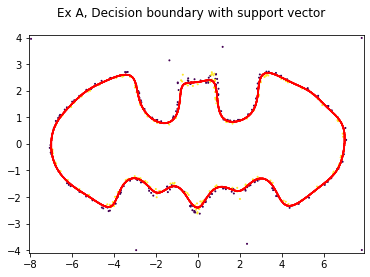

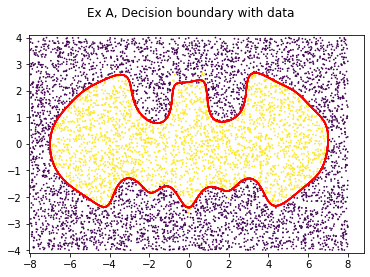

In [5]:
# Ex A.2
# rbf = gaussian,
clf = SVC(kernel="rbf", gamma=.5, C=20)
clf.fit(X_train, y_train)
print("Ex A_2, accuracy:",clf.score(X_train, y_train))

# Ex A.3

# Separate vectors
X1 = X_train[clf.support_, 0]
X2 = X_train[clf.support_, 1]
y_pred = y_train[clf.support_]

# Meshgrid
x_min, x_max = X1.min() - 0.1, X1.max() + 0.1
y_min, y_max = X2.min() - 0.1, X2.max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),
                     np.arange(y_min, y_max, .01))

# plot boundary with support vector    
fig = plt.figure()
fig.suptitle("Ex A, Decision boundary with support vector")
ax = fig.add_subplot(1, 1, 1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Map of predictions
Z = Z.reshape(xx.shape)

# Show the boundary
ax.contour(xx, yy, Z, colors='r')

# plot support vectors
ax.scatter(X1, X2, s=1,c=y_pred)

# plot boundary with data    
fig = plt.figure()
fig.suptitle("Ex A, Decision boundary with data")
ax = fig.add_subplot(1, 1, 1)
ax.contour(xx, yy, Z,colors='r')
ax.scatter(X_train[:,0], X_train[:,1], s=.5,c=y_train)
plt.show()
